In [2]:
import os

# Set the environment variable to enable CPU fallback for MPS
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [33]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as transforms

from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np

In [4]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
    
elif torch.backends.cuda.is_built():
    device = torch.device("cuda")
    x = torch.ones(1, device=device)
    print (x)
    
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [30]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

mnist_train = torchvision.datasets.MNIST(
    root='./Data',
    train=True,
    download=True,
    transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    mnist_train, 
    shuffle=True,
    batch_size=1,
)

mnist_test = torchvision.datasets.MNIST(
    root='./Data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    mnist_test,
    shuffle=True,
    batch_size=1,
)

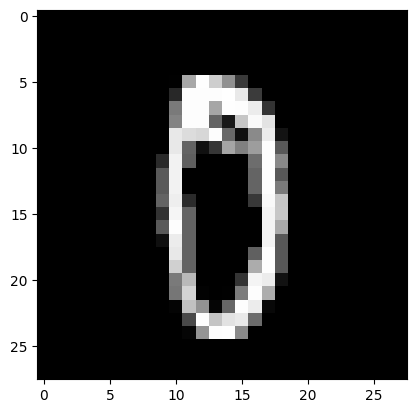

In [31]:
# Let's show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [32]:
images.shape

torch.Size([1, 1, 28, 28])

In [47]:
class Generator(nn.Module): 
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(1, 256)
        self.relu1 = nn.ReLU()
        
        self.linear2 = nn.Linear(256, 784)
        self.relu2 = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        
        x = self.linear2(x)
        x = self.relu2(x)
        
        return x

In [118]:
mu, sigma = 0, 1 # mean and standard deviation
g_in = np.random.normal(mu, sigma, 1)
g_in = torch.Tensor(g_in)
g_in

tensor([-0.2143])

In [159]:
generator = Generator()

In [160]:
g_out = generator(g_in)

In [161]:
g_out_mat = torch.zeros(1, 28, 28)

m = 0
n = 0

for i in range(len(g_out)):
    if i % 28 == 0 and i != 0:
        m += 1
        n = 0
        print(i, m)
        
    g_out_mat[0, m, n] = g_out[i]
    
    n += 1
    


28 1
56 2
84 3
112 4
140 5
168 6
196 7
224 8
252 9
280 10
308 11
336 12
364 13
392 14
420 15
448 16
476 17
504 18
532 19
560 20
588 21
616 22
644 23
672 24
700 25
728 26
756 27


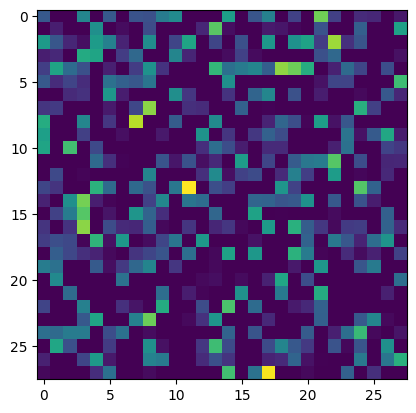

In [162]:
imshow(g_out_mat.detach())

In [163]:
g_out_mat

tensor([[[0.1886, 0.0000, 0.0000, 0.3105, 0.0000, 0.1888, 0.0000, 0.1738,
          0.1634, 0.2794, 0.3228, 0.0000, 0.0000, 0.0000, 0.3792, 0.0000,
          0.1770, 0.2952, 0.0000, 0.1295, 0.0000, 0.5272, 0.1288, 0.0000,
          0.0840, 0.0753, 0.0000, 0.0442],
         [0.0000, 0.0576, 0.0000, 0.0000, 0.3366, 0.0000, 0.0219, 0.0000,
          0.1567, 0.0000, 0.0000, 0.0000, 0.0725, 0.5014, 0.0247, 0.0000,
          0.0000, 0.0482, 0.0402, 0.0119, 0.0000, 0.1734, 0.0000, 0.0000,
          0.2033, 0.0000, 0.0000, 0.3862],
         [0.3684, 0.1795, 0.0728, 0.0238, 0.3698, 0.2932, 0.0684, 0.0000,
          0.3281, 0.0000, 0.1406, 0.3925, 0.0000, 0.1411, 0.0000, 0.1645,
          0.0000, 0.3575, 0.0000, 0.3425, 0.3883, 0.1205, 0.5750, 0.0947,
          0.1786, 0.0000, 0.0000, 0.0000],
         [0.0570, 0.0784, 0.0000, 0.4130, 0.3929, 0.0000, 0.1187, 0.2266,
          0.0000, 0.0023, 0.3057, 0.0706, 0.0000, 0.0000, 0.0229, 0.1300,
          0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.1652,